<a href="https://colab.research.google.com/github/tamnol/DeepLearning-AI/blob/master/NLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-29 03:44:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-29 03:44:06 (125 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [6]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length = max_sequence_len -1))
model.add( Bidirectional(LSTM(100, return_sequences= True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(64)))
model.add( Dense(total_words, kernel_regularizer=regularizers.l1(0.01), activation='relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
adam = Adam(lr= 0.01)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 200)           183200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               135680    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              414219    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              10313732  
Total params: 11,457,839
Trainable params: 11,457,839
Non-trainable params: 0
__________________________________________

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

W0829 03:44:24.817711 139731177293696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 52s 3ms/sample - loss: 10.2826 - acc: 0.0206
Epoch 2/100
15462/15462 [==============================] - 50s 3ms/sample - loss: 7.0676 - acc: 0.0221
Epoch 3/100
15462/15462 [==============================] - 50s 3ms/sample - loss: 7.0594 - acc: 0.0208
Epoch 4/100
15462/15462 [==============================] - 50s 3ms/sample - loss: 7.0571 - acc: 0.0203
Epoch 5/100
15462/15462 [==============================] - 50s 3ms/sample - loss: 7.0669 - acc: 0.0215
Epoch 6/100
15462/15462 [==============================] - 50s 3ms/sample - loss: 7.0569 - acc: 0.0239
Epoch 7/100
15462/15462 [==============================] - 50s 3ms/sample - loss: 7.0300 - acc: 0.0225
Epoch 8/100
15462/15462 [==============================] - 49s 3ms/sample - loss: 6.9895 - acc: 0.0228
Epoch 9/100
15462/15462 [==============================] - 49s 3ms/sample - loss: 6.9322 - acc: 0.0254
Epoch 10/100
15462/15462 [==============================] - 49s 3ms/samp

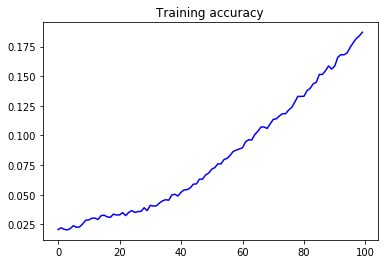

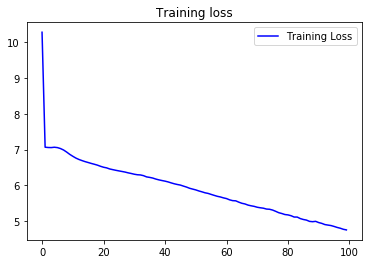

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "natural language processing is interesting ML module to learn because"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

natural language processing is interesting ML module to learn because seal wing madmen's fell excess defects deem'd legacy soundless mayst pitiful eternal eternal poverty poverty deem'd compared compared compared 'this 'this 'this 'this wrong inviting there sovereign sovereign sovereign sovereign ord poverty babe babe fawn expire him him abide tyrannous wasted babe graven abide sovereign ord ord eternal eternal telling eternal revenues purpose purpose 'this misprision proclaims afford afford poverty poverty more ensconce ensconce ensconce sums sums sums sweetest sweetest sweetest sweetest sweetest sweetest sweetest prescriptions prescriptions robbery 'this drugs drugs drugs shouldst bravery bravery whate'er abide abide extremity abide extremity balmy mortgaged mortgaged balmy anticipate kissing kissing kissing anticipate
